In [1]:
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

sys.path.append('../')

from common import load_csv_to_dataframe, dataset_to_x_and_y, split_dataset
from constants import PART_OF_DATA, ALL_DATA
from mlp_neural_network import mlp_model
from random_forest import random_forest_model
from support_vector_machine import svm_model
from logistic_regression import lr_model
from k_nearest_neighbor import knn_model


pandas_dataframe = load_csv_to_dataframe(ALL_DATA, nrows=None)
# pandas_dataframe = load_csv_to_dataframe(PART_OF_DATA, nrows=None)

x_train, x_test, y_train, y_test = split_dataset(pandas_dataframe)

models = [
    ("K-nearest Neighbors", knn_model()),
    ("Logistic Regression", lr_model()),
    ("Random Forest", random_forest_model()),
    ("Multi-layer Perceptron", mlp_model()),
    # ("Support Vector Machine", svm_model()),
]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06739D+06    |proj g|=  4.54890D+05


 This problem is unconstrained.



At iterate   50    f=  3.17549D+05    |proj g|=  2.01508D+03

At iterate  100    f=  3.06373D+05    |proj g|=  1.49423D+03

At iterate  150    f=  3.02684D+05    |proj g|=  1.32543D+03

At iterate  200    f=  2.97745D+05    |proj g|=  6.95228D+02

At iterate  250    f=  2.96842D+05    |proj g|=  4.16676D+02

At iterate  300    f=  2.95670D+05    |proj g|=  4.56171D+02

At iterate  350    f=  2.94834D+05    |proj g|=  2.31274D+02

At iterate  400    f=  2.94622D+05    |proj g|=  2.06137D+02

At iterate  450    f=  2.94390D+05    |proj g|=  4.66684D+02

At iterate  500    f=  2.94194D+05    |proj g|=  3.67255D+02

At iterate  550    f=  2.94056D+05    |proj g|=  9.67511D+01

At iterate  600    f=  2.93987D+05    |proj g|=  2.41172D+02

At iterate  650    f=  2.93948D+05    |proj g|=  4.77743D+01

At iterate  700    f=  2.93937D+05    |proj g|=  3.82188D+01

At iterate  750    f=  2.93922D+05    |proj g|=  4.04897D+01

At iterate  800    f=  2.93897D+05    |proj g|=  1.11571D+02

At iter

/home/nicolas/.cache/pypoetry/virtualenvs/ids-model-VfrJ7pYc-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min finished


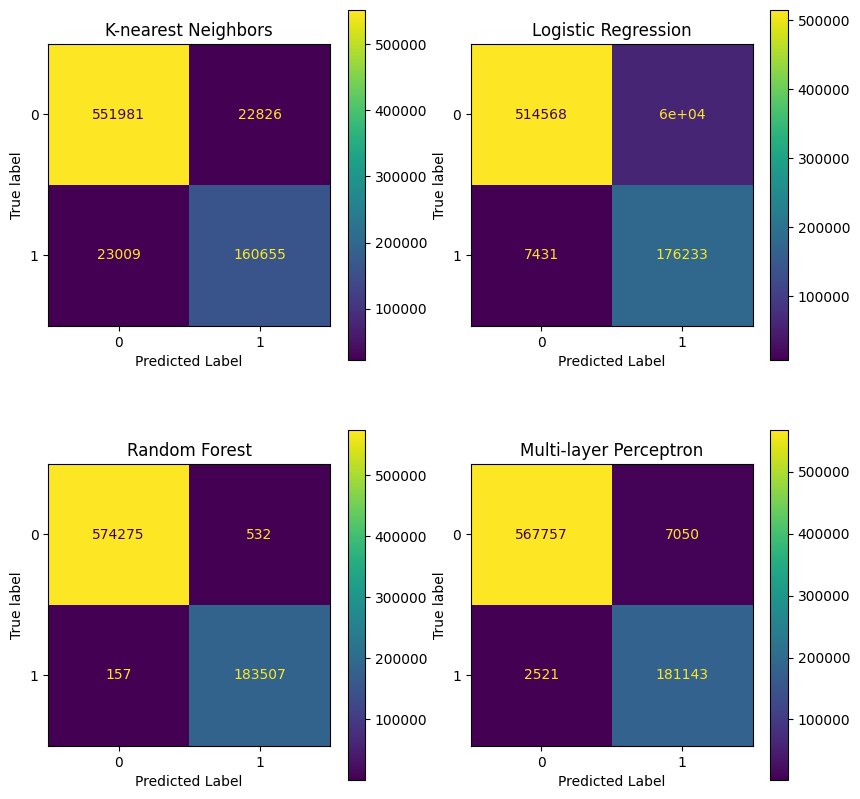

In [2]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


for i, (model_name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    c = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Determine the row and column index for the subplot
    row_idx = i // 2
    col_idx = i % 2

    # Draw the confusion matrix plot on the corresponding subplot
    if row_idx == 0 and col_idx == 0:
        c.plot(ax=ax1)
    elif row_idx == 0 and col_idx == 1:
        c.plot(ax=ax2)
    elif row_idx == 1 and col_idx == 0:
        c.plot(ax=ax3)
    elif row_idx == 1 and col_idx == 1:
        c.plot(ax=ax4)

    ax = fig.axes[i]
    ax.set_title(model_name)
    ax.set_xlabel('Predicted Label')

plt.savefig("conf-matrix.svg", format="svg", bbox_inches='tight')
plt.show()
